## 1.Importing all the required libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## 2.Loading Dataset 

In [2]:
df = pd.read_excel('C:/Users/haris/Downloads/DryBeanDataset/DryBeanDataset/Dry_Bean_Dataset.xlsx')
print(df.head())

    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332  

## 3. Exploaratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [4]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [5]:
unique_classes= df['Class'].unique()
print('unique_classes are',unique_classes)

unique_classes are ['SEKER' 'BARBUNYA' 'BOMBAY' 'CALI' 'HOROZ' 'SIRA' 'DERMASON']


In [6]:
df2=df.drop_duplicates()
num_duplicates = df2.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 0


In [7]:
df.isnull().sum() #Checking is there any null value

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

Text(0.5, 1.0, 'Count of each bean type')

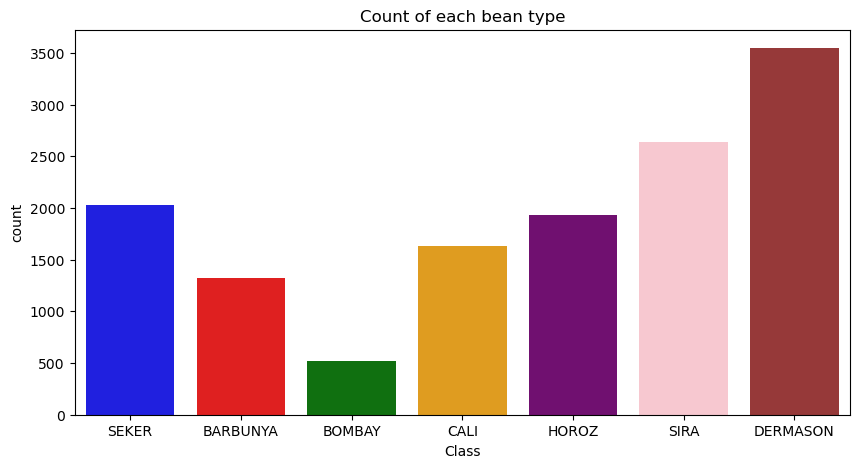

In [8]:
plt.figure(figsize=(10,5))
sns.countplot(x='Class',data=df,palette=['blue','red','green','orange','purple','pink','brown'])
plt.title('Count of each bean type')

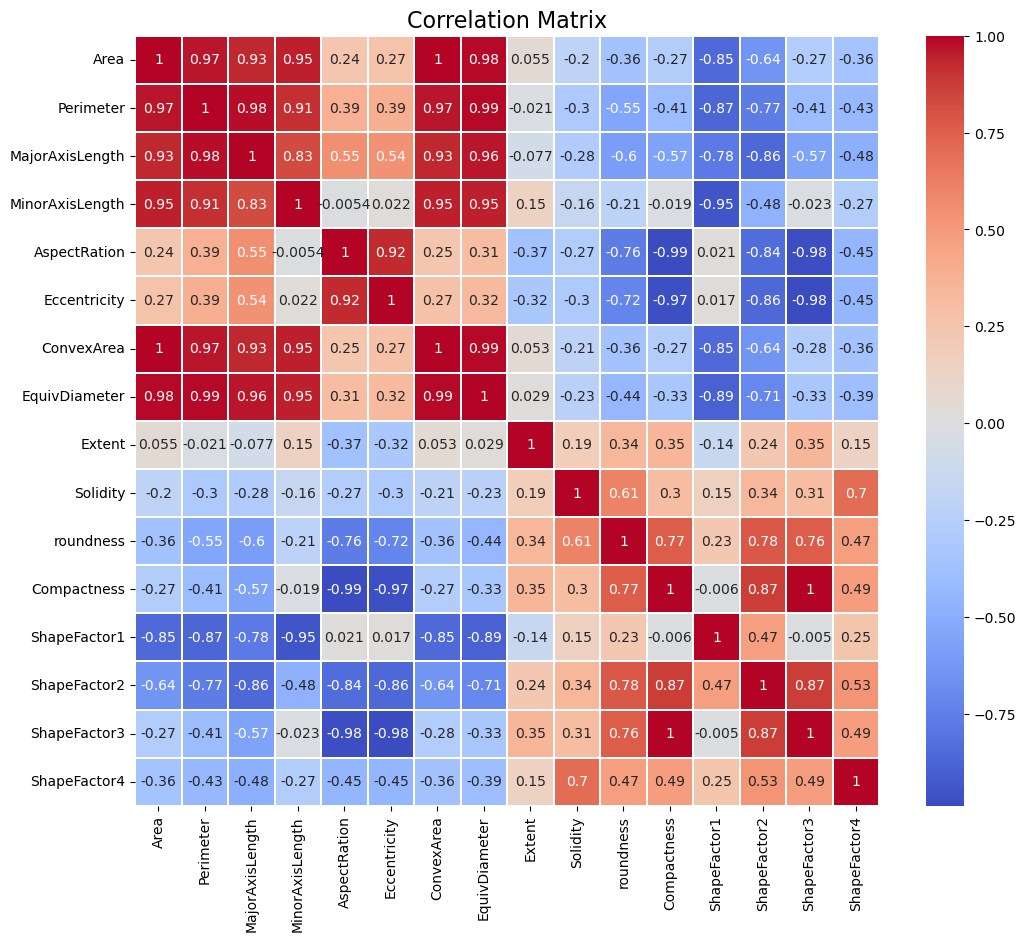

In [9]:
corr = df2.corr(numeric_only=True)
# Create a heatmap with color
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.1, ax=ax)

# Set the title
ax.set_title('Correlation Matrix', fontsize=16)

# Show the plot
plt.show()

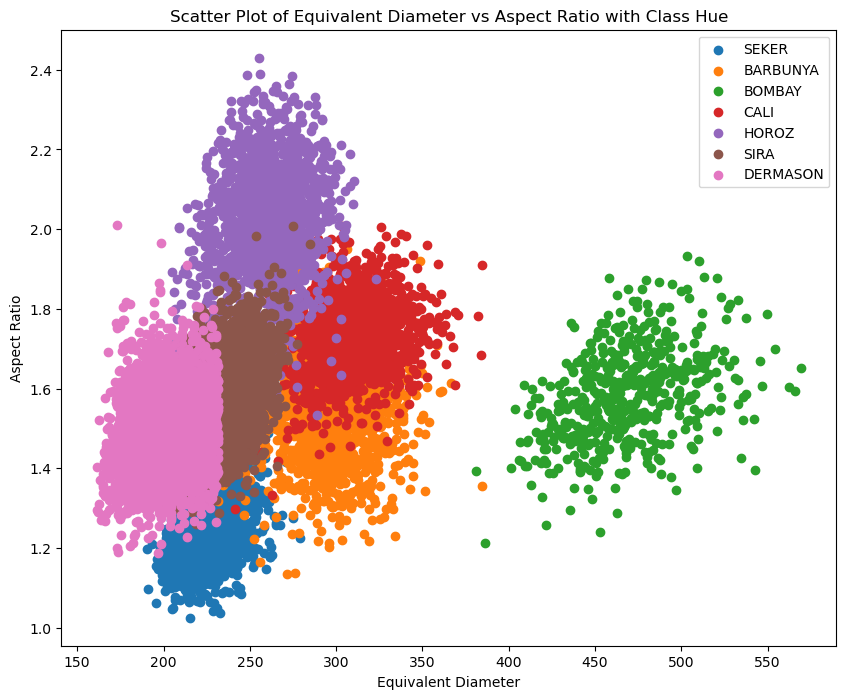

In [10]:
fig, ax = plt.subplots(figsize=(10, 8))
for cls in df2['Class'].unique():
    ax.scatter(df2.loc[df2['Class'] == cls, 'EquivDiameter'], df2.loc[df2['Class'] == cls, 'AspectRation'], label=cls)

ax.legend()
ax.set_xlabel('Equivalent Diameter')
ax.set_ylabel('Aspect Ratio')
ax.set_title('Scatter Plot of Equivalent Diameter vs Aspect Ratio with Class Hue')
plt.show()

In [11]:
new_df=df2.drop(['Class'],axis=1)
# printing the names of column to check the 'labels' coloumn removed or not
print(new_df.columns)


Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'],
      dtype='object')


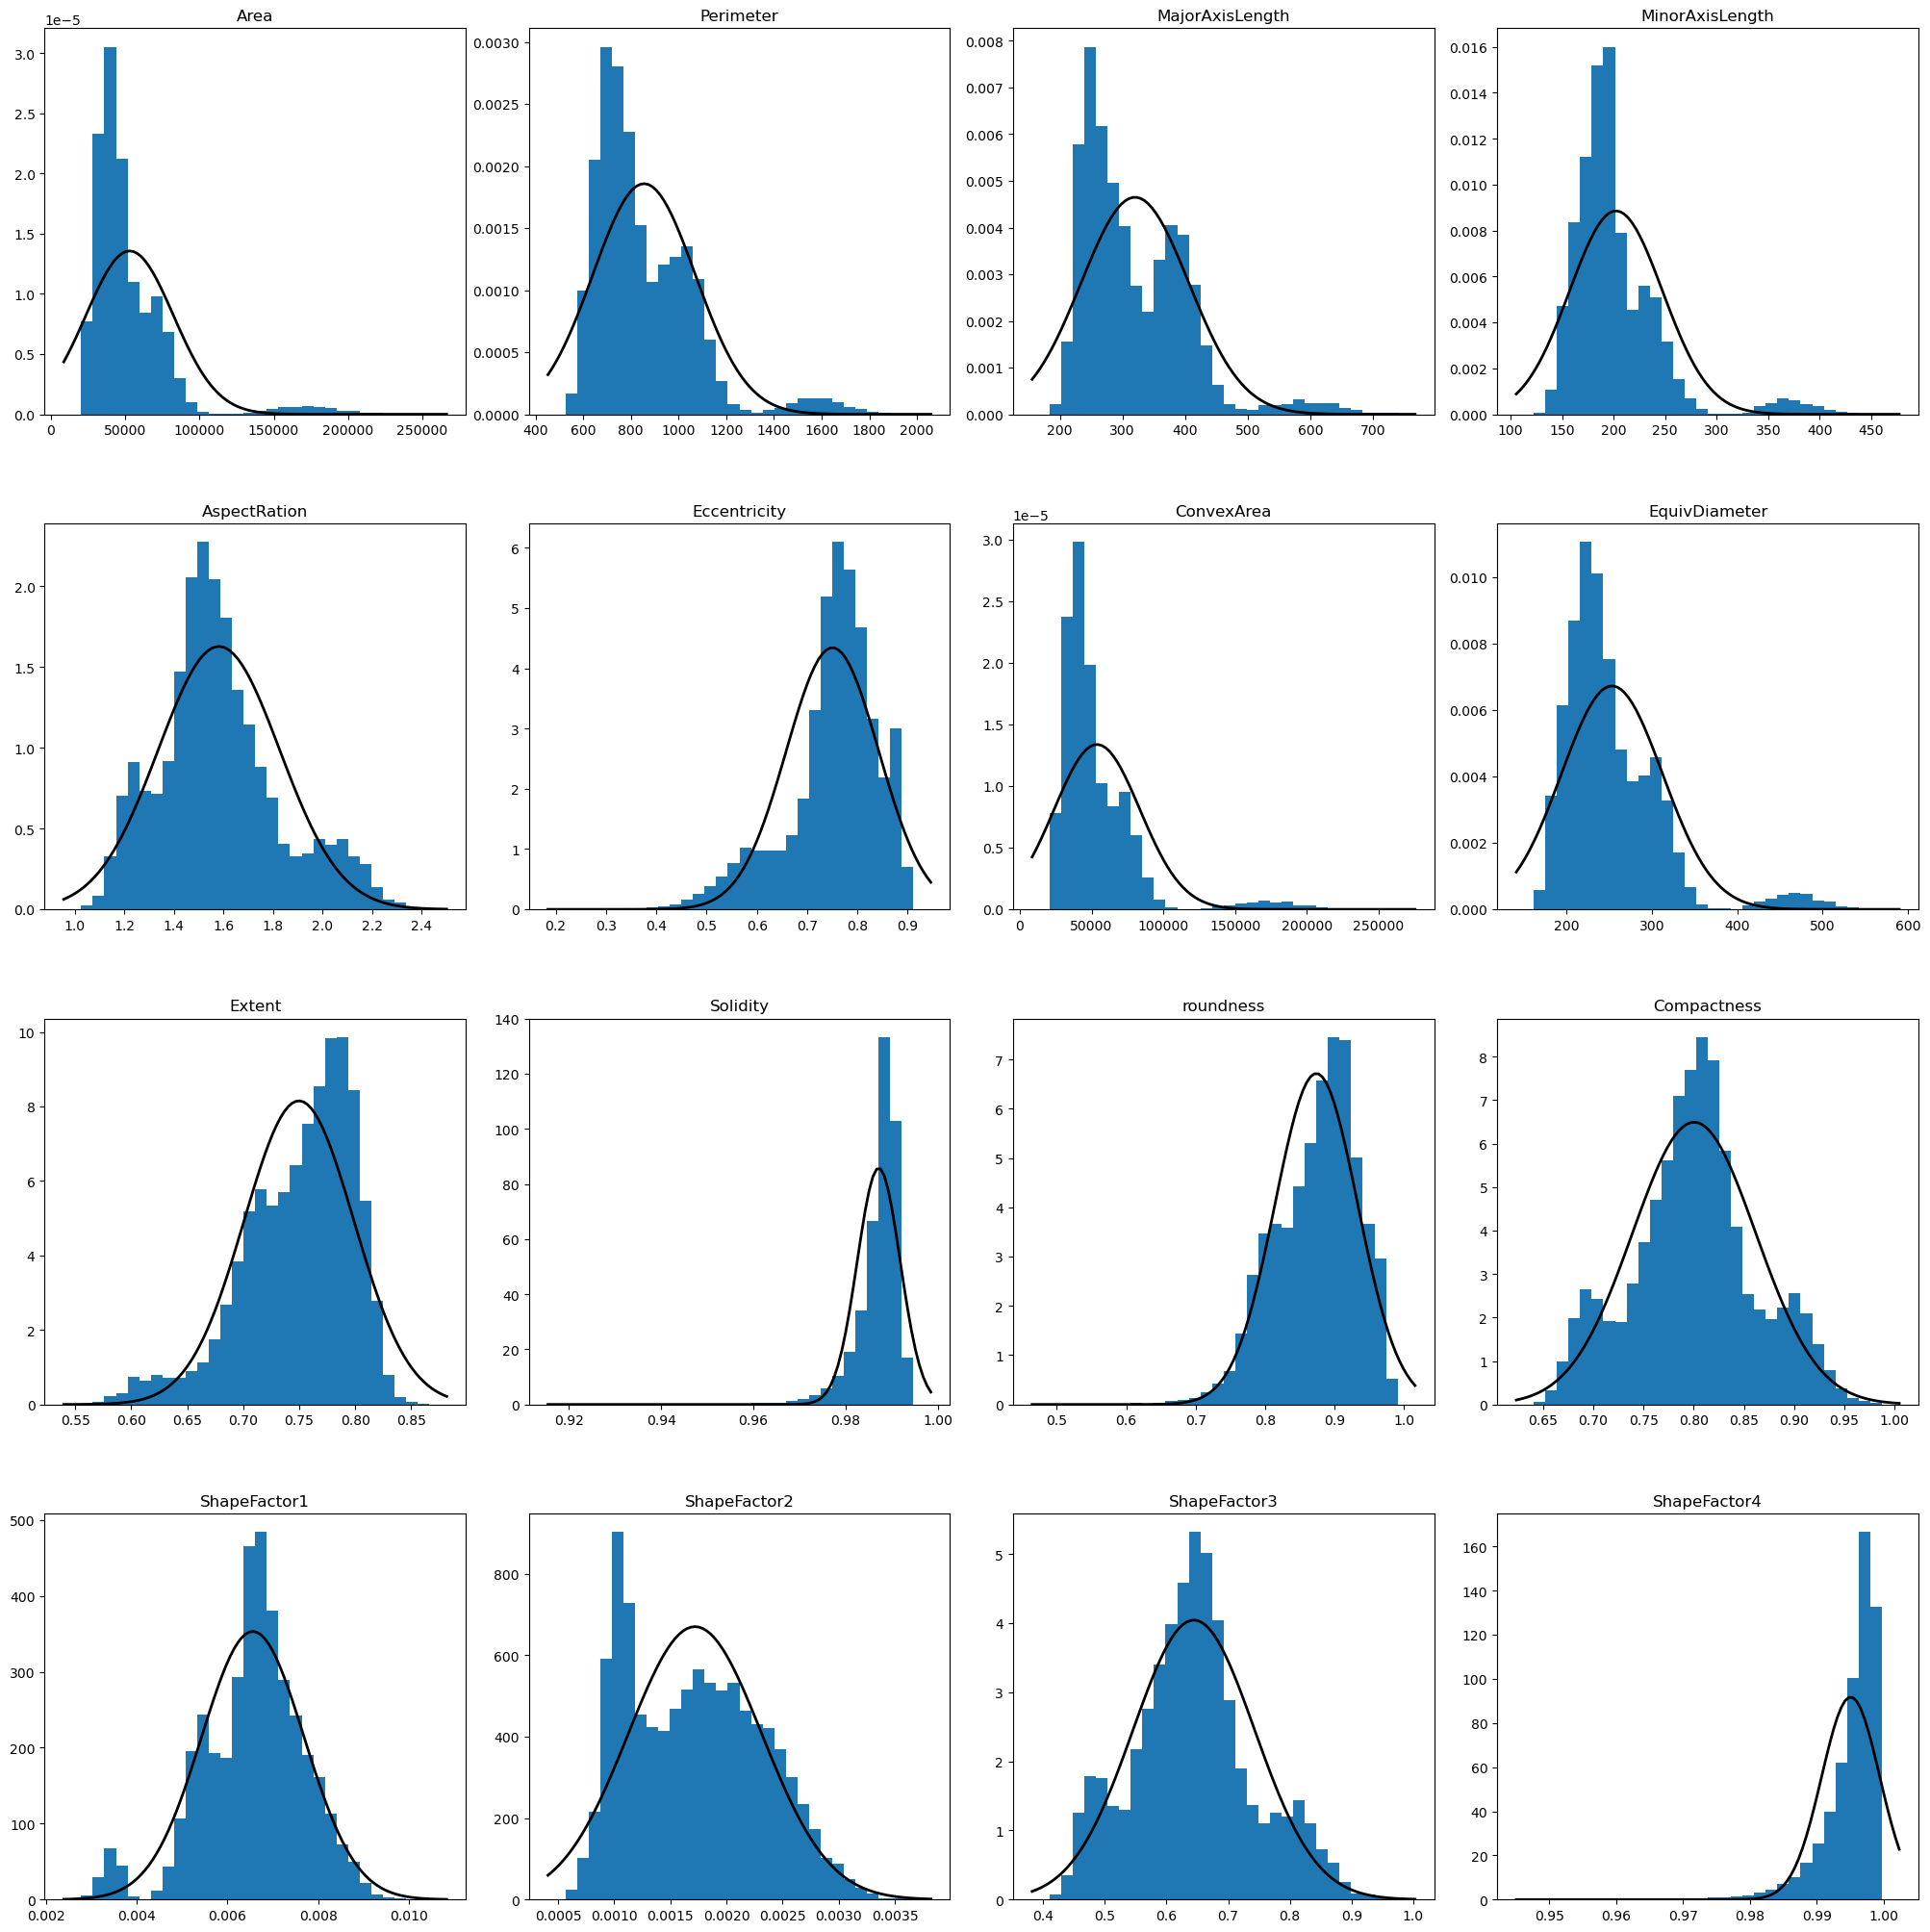

In [12]:
#Histogram with Fitted Normal Distribution Curve for Multiple Variables

from scipy.stats import norm

fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(20, 20))
index = 0

axs = axs.flatten()
for k, v in new_df.items():
    axs[index].hist(v, bins=30, density=True)

    # draw bell-shaped curve
    mu, std = norm.fit(v)
    xmin, xmax = axs[index].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    axs[index].plot(x, p, 'k', linewidth=2)

    axs[index].set_title(k)
    index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()


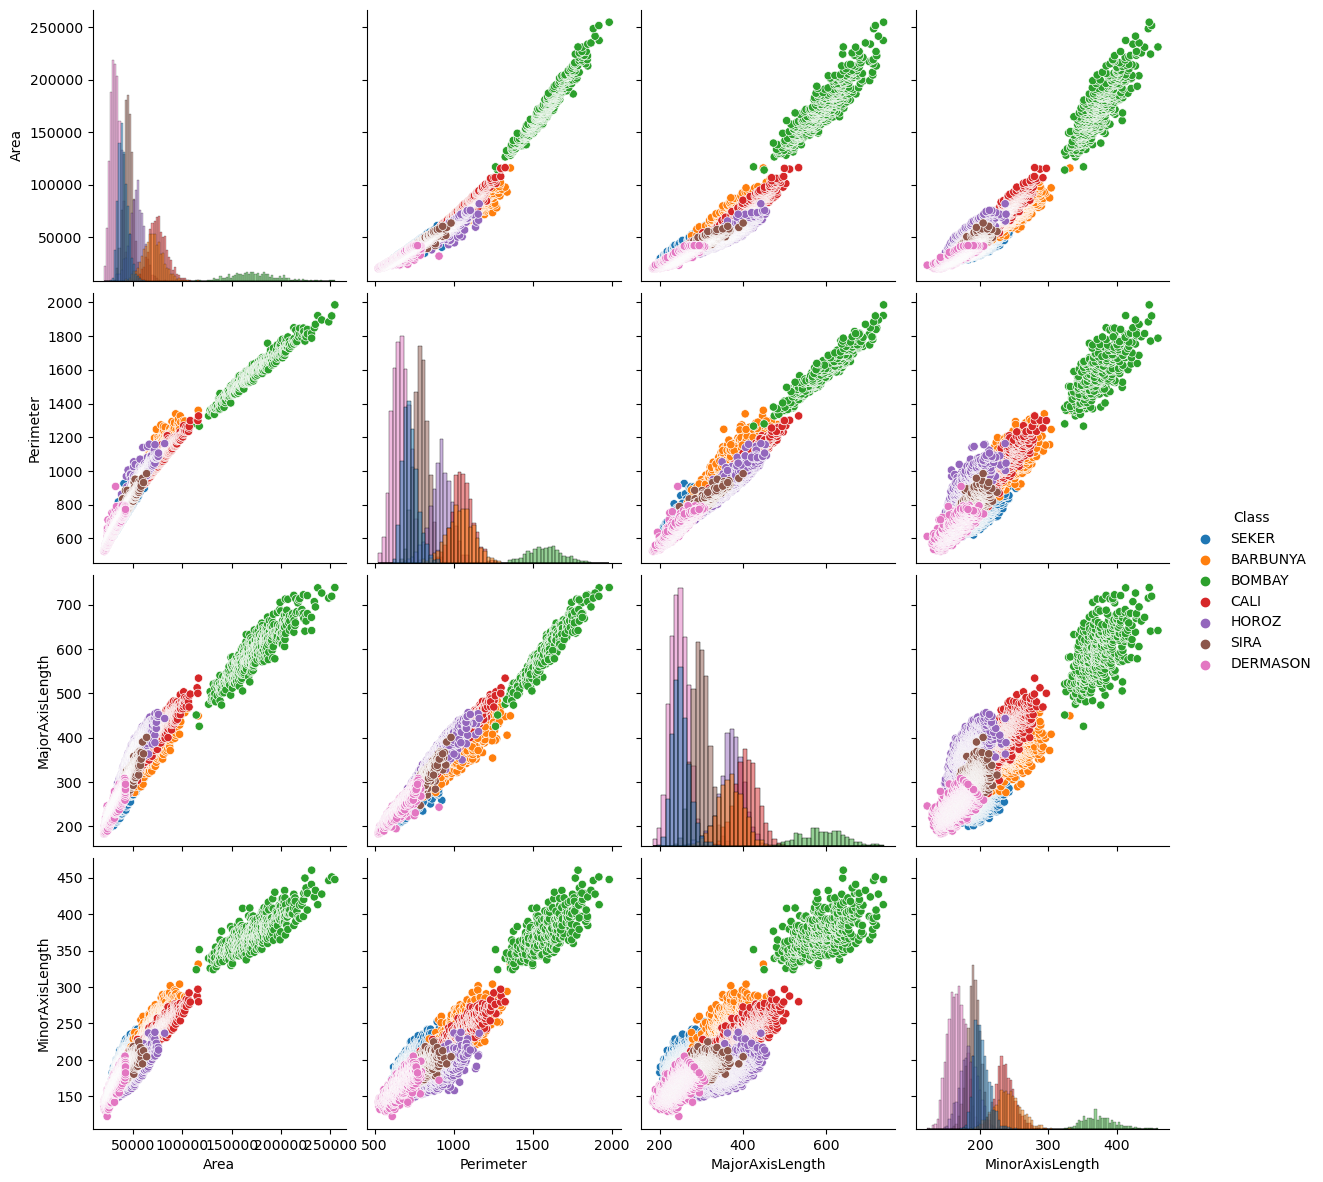

In [13]:
sns.pairplot(df.drop(['AspectRation','Eccentricity','ConvexArea',	
    'EquivDiameter',	
    'Extent',	
    'Solidity',	
    'roundness',	
    'Compactness',	
    'ShapeFactor1',	
    'ShapeFactor2',	
    'ShapeFactor3',	
    'ShapeFactor4'], axis=1), hue='Class', height=3, diag_kind='hist')

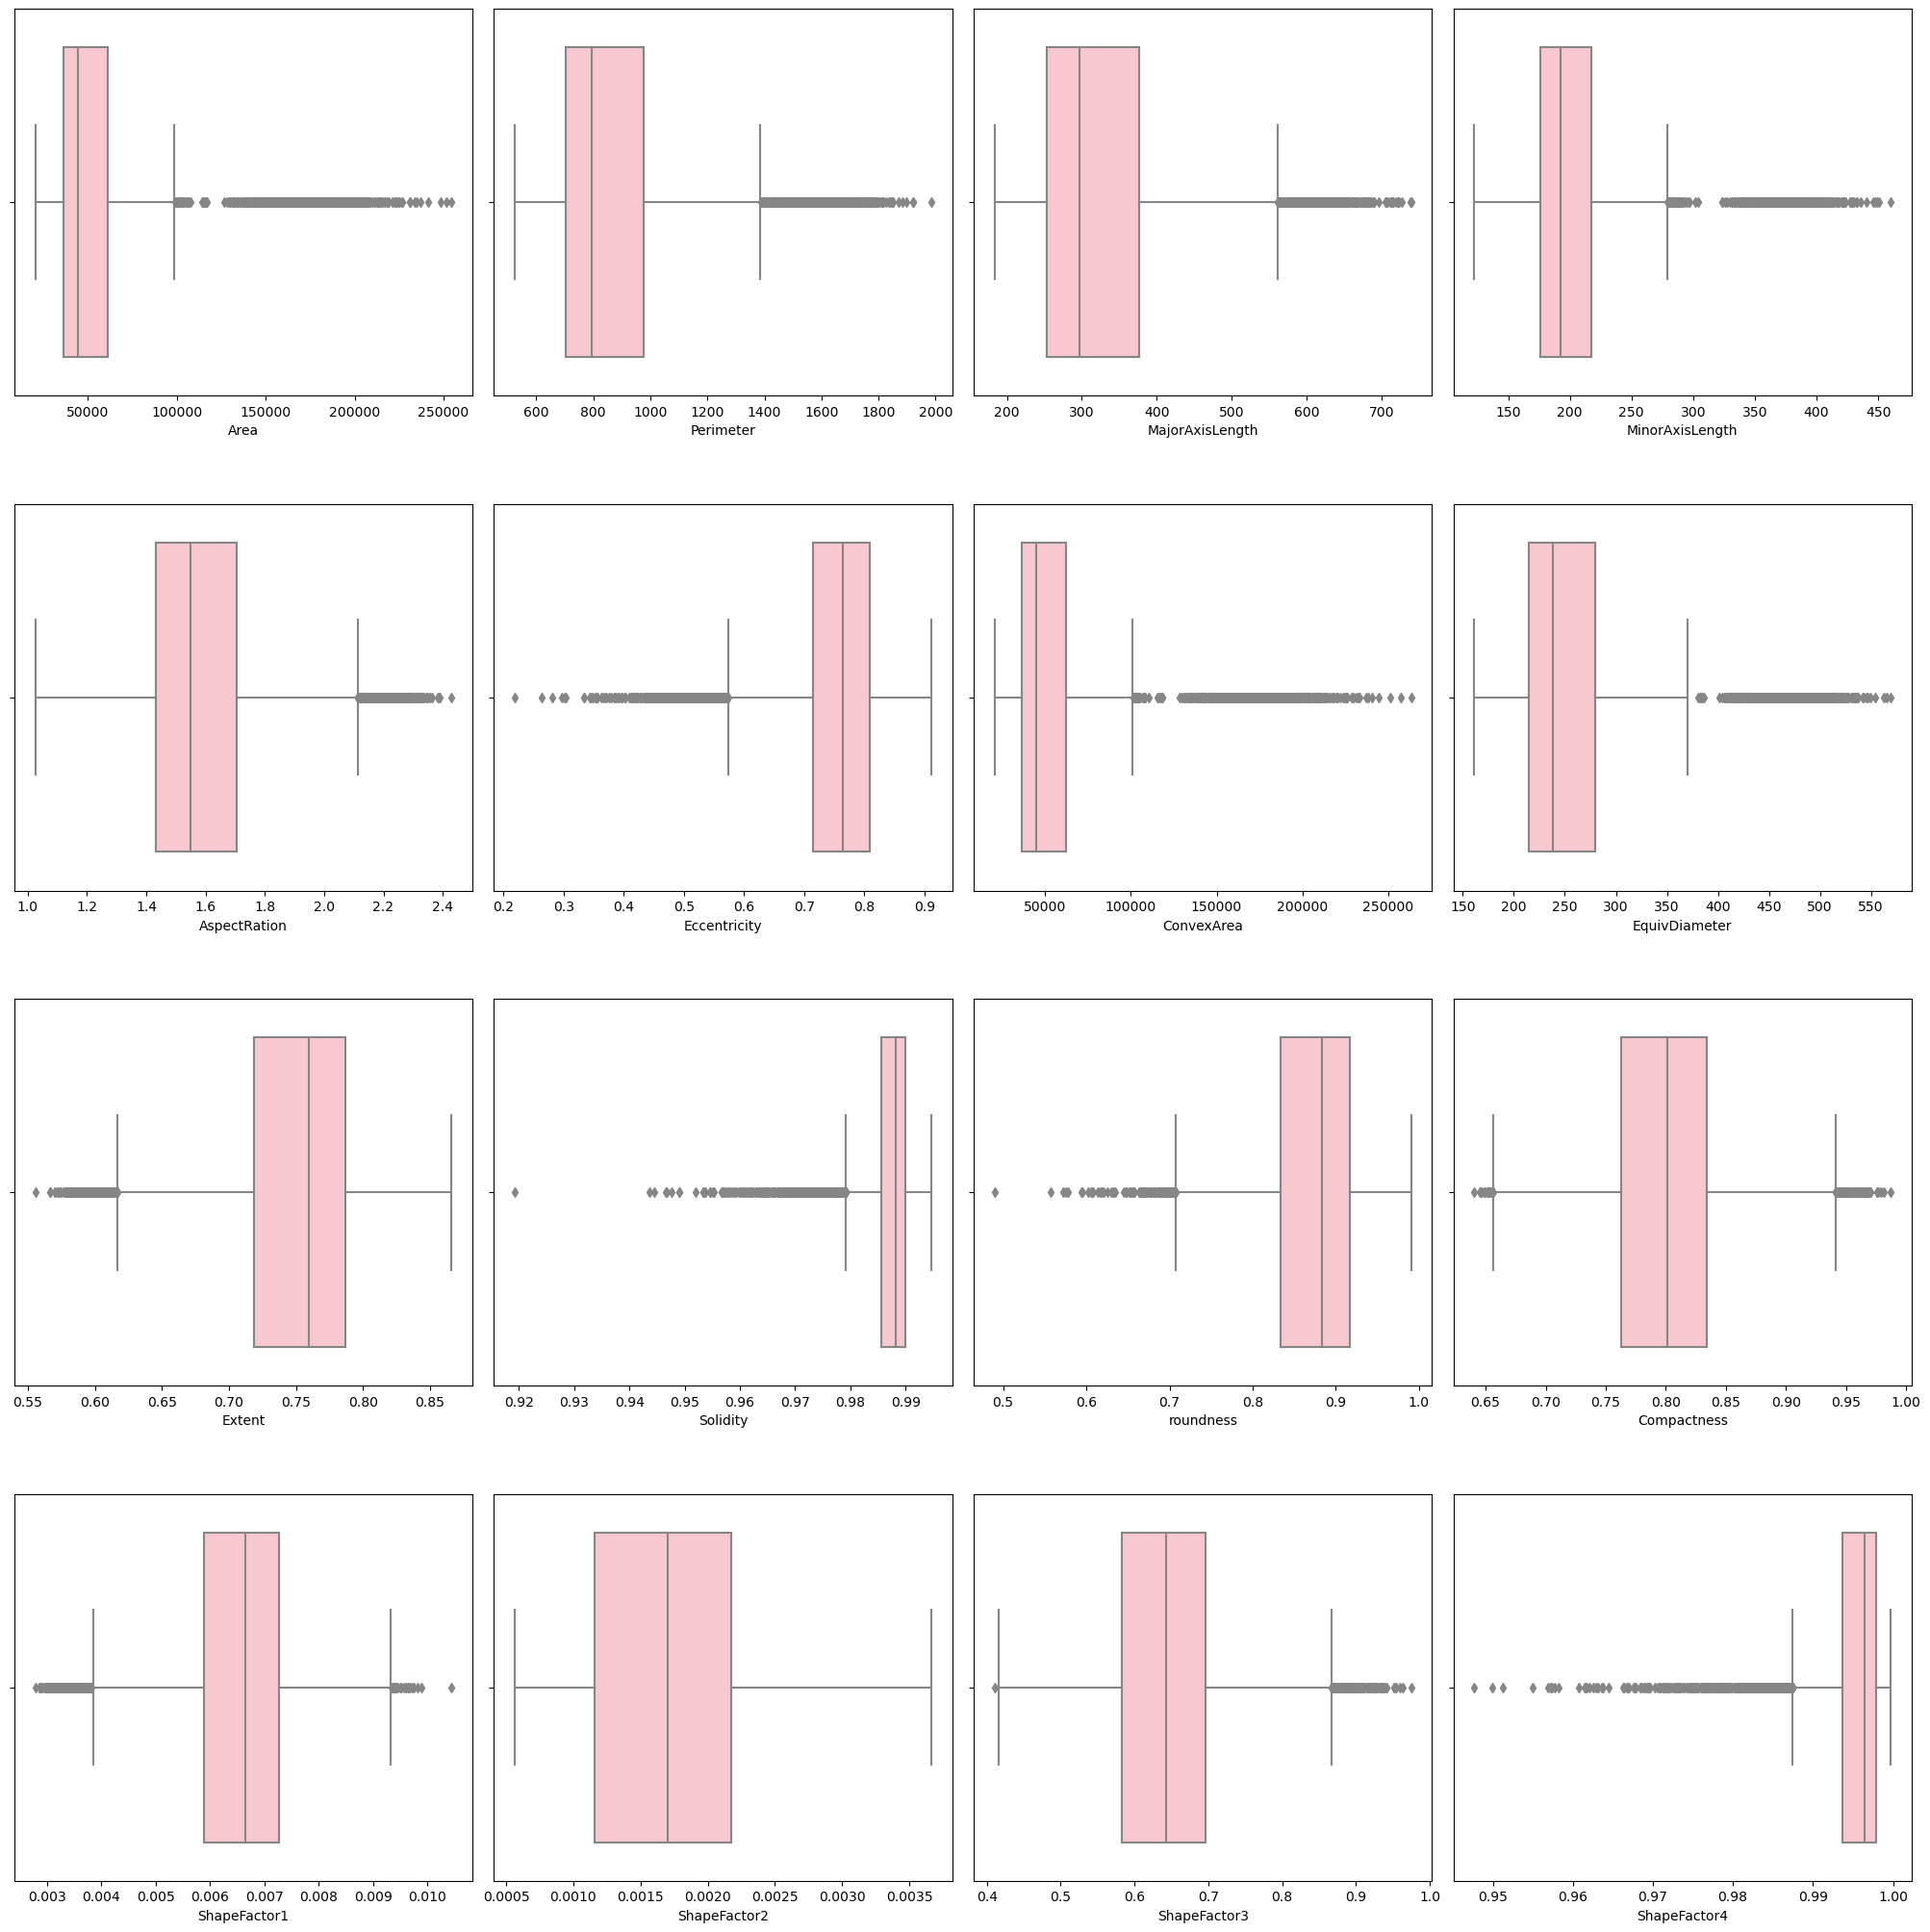

In [14]:
#check for outliers
fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(20, 20))
index = 0

axs = axs.flatten()
for k, v in new_df.items():
    sns.boxplot(x=v, ax=axs[index],color='pink')
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [41]:
#removing outliers
def remove_outliers(df2, features, coeff=1.5):
    """
    Removes outliers from a dataframe for a given list of features.

    Args:
    df: pandas.DataFrame
    features: list of str
    coeff: float, default=1.5

    Returns:
    pandas.DataFrame without the outliers
    """

    outlier_indices = []

    for c in features:
        Q1 = np.percentile(df2[c], 25)
        Q3 = np.percentile(df2[c], 75)
        IQR = Q3 - Q1
        outlier_step = IQR * coeff
        outlier_list_col = df2[(df2[c] < Q1 - outlier_step) | (df2[c] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)

    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 1)

    # Drop the outliers
    df2 = df2.drop(multiple_outliers, axis=0).reset_index(drop=True)

    return df2


## 3.Data Splitting

In [32]:
# Split the dataset into training and testing sets
X = df2.drop(columns=['Class'])
y = df2['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)



Training set shape: (10834, 16) (10834,)
Testing set shape: (2709, 16) (2709,)


In [33]:
# Split the dataset into training and testing sets
X = df2.drop(columns=['Class'])
y = df2['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (10834, 16) (10834,)
Testing set shape: (2709, 16) (2709,)


## 3.1 Feature scaling

In [34]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 4.Training Models

## 4.1Training Different Models

In [39]:
from sklearn.neural_network import MLPClassifier

models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "MLP": MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=500,random_state=42)
}

for model_name, model in models.items():
    # Train model
    model.fit(X_train, y_train.values.ravel())

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred, average='weighted')
    model_test_recall = recall_score(y_test, y_test_pred, average='weighted')

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train, y_train_pred, average='weighted')
    model_train_recall = recall_score(y_train, y_train_pred, average='weighted')

    print(model_name)

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:4f}'.format(model_train_f1))
    print('- Precision: {:4f}'.format(model_train_precision))
    print('- Recall: {:4f}'.format(model_train_recall))

    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- Fl score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))

    print('='*35)
    print('\n')


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.000000
- Precision: 1.000000
- Recall: 1.000000
----------------------------------
Model performance for Test set
- Accuracy: 0.8933
- Fl score: 0.8933
- Precision: 0.8934
- Recall: 0.8933


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9626
- F1 score: 0.962595
- Precision: 0.962635
- Recall: 0.962618
----------------------------------
Model performance for Test set
- Accuracy: 0.9221
- Fl score: 0.9221
- Precision: 0.9223
- Recall: 0.9221


SVM
Model performance for Training set
- Accuracy: 0.9276
- F1 score: 0.927674
- Precision: 0.927779
- Recall: 0.927635
----------------------------------
Model performance for Test set
- Accuracy: 0.9269
- Fl score: 0.9270
- Precision: 0.9272
- Recall: 0.9269


MLP
Model performance for Training set
- Accuracy: 0.9323
- F1 score: 0.932324
- Precision: 0.932519
- Recall: 0.932250
----------------------------------
Model performance for Test set
-

## 4.2 SVM 


In [23]:
# Train the SVM model
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9269102990033222


## 4.3 HyperParameter Tuning for SVM Classifier using GridSearachCV

In [24]:
# Define the SVM classifier
svc = SVC()

# Define the hyperparameters to tune
parameters = {'kernel': ['linear', 'rbf', 'poly'], 'C': [0.1, 1, 10], 'gamma': [0.1, 1, 'scale']}

# Perform grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(svc, parameters, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Make predictions on the test data using the best hyperparameters
y_pred = grid_search.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("classification report")
print(classification_report(y_test, y_pred))


Best hyperparameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Accuracy: 0.9328165374677002
classification report
              precision    recall  f1-score   support

    BARBUNYA       0.95      0.92      0.93       259
      BOMBAY       1.00      1.00      1.00       114
        CALI       0.93      0.96      0.95       305
    DERMASON       0.92      0.93      0.93       707
       HOROZ       0.98      0.95      0.97       376
       SEKER       0.95      0.95      0.95       414
        SIRA       0.88      0.89      0.89       534

    accuracy                           0.93      2709
   macro avg       0.94      0.94      0.94      2709
weighted avg       0.93      0.93      0.93      2709



In [54]:
from sklearn.metrics import confusion_matrix

# Define the SVM classifier
svc = SVC(C=1, gamma=0.1, kernel='rbf')

# Train the model using the best hyperparameters
svc.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svc.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(cm)


[[237   0  14   0   0   1   7]
 [  0 114   0   0   0   0   0]
 [  8   0 293   0   1   1   2]
 [  0   0   0 656   0  10  41]
 [  0   0   7   5 359   0   5]
 [  4   0   0   8   0 393   9]
 [  1   0   0  42   8   8 475]]


## 4.4 HyperParameter Tuning for SVM Classifier using BayesSearchCV

In [46]:
!pip install scikit-optimize
from skopt import BayesSearchCV


     -------------------------------------- 100.3/100.3 kB 2.8 MB/s eta 0:00:00


In [47]:
# Import required libraries
from sklearn.svm import SVC
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.metrics import classification_report, accuracy_score

# Define the SVM classifier
svc = SVC()

# Define the hyperparameters to tune with their respective search ranges
params = {
    'C': Real(0.1, 10),
    'kernel': Categorical(['linear', 'rbf', 'poly']),
    'gamma': Real(0.1, 1, prior='log-uniform')
}

# Define the BayesSearchCV object
opt = BayesSearchCV(
    svc,
    params,
    n_iter=10, # Number of parameter settings that are sampled
    cv=5, # Number of cross-validation folds
    n_jobs=-1, # Number of CPU cores to use for parallel computations (-1 means use all available)
    verbose=1, # Controls verbosity of output
    scoring='accuracy', # Metric to optimize during cross-validation
    return_train_score=True, # Return training scores along with test scores
    random_state=42 # Random seed for reproducibility
)

# Fit the BayesSearchCV object to the training data
opt.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", opt.best_params_)

# Make predictions on the test data using the best hyperparameters
y_pred = opt.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("classification report")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\haris\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best hyperparameters: OrderedDict([('C', 7.366877378057127), ('gamma', 0.869700535740794), ('kernel', 'linear')])
Accuracy: 0.9265411590992987
classification report
              precision    recall  f1-score   support

    BARBUNYA       0.93      0.93      0.93       259
      BOMBAY       1.00      1.00      1.00       114
        CALI       0.93      0.94      0.94       305
    DERMASON       0.92      0.91      0.92       707
       HOROZ       0.97      0.95

In [48]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[242   0  14   0   0   0   3]
 [  0 114   0   0   0   0   0]
 [ 12   0 288   0   2   1   2]
 [  0   0   0 646   0   9  52]
 [  1   0   6   5 357   0   7]
 [  5   0   0  11   0 388  10]
 [  1   0   1  40   9   8 475]]


## 4.5 Hyperparameter Tuning for GradientBoostingClassifier Using GridSearchCV

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid to search
param_grid = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}

# Create a Gradient Boosting classifier object
gb_classifier = GradientBoostingClassifier(random_state=42)

# Create GridSearchCV object with the specified parameters
gb_grid_search = GridSearchCV(
    gb_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1
)

# Fit the GridSearchCV object to the data
gb_grid_search.fit(X_train, y_train.values.ravel())

# Print the best parameters and the corresponding score
print(f"Best parameters: {gb_grid_search.best_params_}")
print(f"Best score: {gb_grid_search.best_score_}")



Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
Best score: 0.9268970765631199


## 4.6 Hyperparameter Tuning for GradientBoostingClassifier Using RandomizedSearchCV

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define parameter distribution to search
param_dist = {
    'learning_rate': uniform(0.01, 0.3),
    'n_estimators': randint(50, 500),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

# Create a Gradient Boosting classifier object
gb_classifier = GradientBoostingClassifier(random_state=42)

# Create RandomizedSearchCV object with the specified parameters
gb_random_search = RandomizedSearchCV(
    gb_classifier, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1
)

# Fit the RandomizedSearchCV object to the data
gb_random_search.fit(X_train, y_train.values.ravel())

# Print the best parameters and the corresponding score
print(f"Best parameters: {gb_random_search.best_params_}")
print(f"Best score: {gb_random_search.best_score_}")


Best parameters: {'learning_rate': 0.29177377507355146, 'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 14, 'n_estimators': 193}
Best score: 0.9293888730521322


In [55]:
from sklearn.metrics import classification_report

# Create a Gradient Boosting classifier object with the best hyperparameters
gb_classifier = GradientBoostingClassifier(
    learning_rate=0.29177377507355146,
    n_estimators=193,
    max_depth=9,
    min_samples_split=14,
    min_samples_leaf=4,
    random_state=42
)

# Fit the Gradient Boosting classifier to the data
gb_classifier.fit(X_train, y_train.values.ravel())

# Predict the labels for the test data
y_pred = gb_classifier.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    BARBUNYA       0.93      0.90      0.92       259
      BOMBAY       1.00      1.00      1.00       114
        CALI       0.93      0.96      0.95       305
    DERMASON       0.92      0.92      0.92       707
       HOROZ       0.97      0.94      0.96       376
       SEKER       0.94      0.93      0.94       414
        SIRA       0.87      0.90      0.88       534

    accuracy                           0.93      2709
   macro avg       0.94      0.94      0.94      2709
weighted avg       0.93      0.93      0.93      2709



## 4.7 Hyperparamter Tuning for  DecisionTreeClassifier

In [52]:
# Define the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Define the parameter grid to search over
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, 15],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8]
}

# Perform a grid search over the parameter grid using 5-fold cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)

# Train the grid search object on the training data
grid_search.fit(X_train, y_train)

# Make predictions on the test data using the best model from the grid search
y_pred = grid_search.predict(X_test)

# Print the best hyperparameters found by the grid search
print("Best hyperparameters:", grid_search.best_params_)
print(classification_report(y_test, y_pred))

Best hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 2}
              precision    recall  f1-score   support

    BARBUNYA       0.90      0.90      0.90       259
      BOMBAY       1.00      1.00      1.00       114
        CALI       0.92      0.91      0.92       305
    DERMASON       0.89      0.93      0.91       707
       HOROZ       0.95      0.94      0.95       376
       SEKER       0.93      0.90      0.92       414
        SIRA       0.88      0.87      0.87       534

    accuracy                           0.91      2709
   macro avg       0.92      0.92      0.92      2709
weighted avg       0.91      0.91      0.91      2709



In [63]:
# Assuming you have trained and tested your model and obtained the predicted class labels and actual class labels
y_pred = model.predict(X_test)
test_df = pd.DataFrame(X_test, columns=X.columns)
output_df = pd.DataFrame({'ID': test_df.index, 'Class': y_pred})
print(output_df.head(10))
# write the DataFrame to output file
output_df.to_csv('output_file.csv', index=False)



   ID     Class
0   0     SEKER
1   1      CALI
2   2  DERMASON
3   3    BOMBAY
4   4  DERMASON
5   5    BOMBAY
6   6  BARBUNYA
7   7  DERMASON
8   8  DERMASON
9   9  BARBUNYA


In [67]:
# Make predictions on the test data using the best hyperparameters
y_pred = grid_search.predict(X_test)

# Compare predicted and actual class labels
compare = pd.DataFrame({'predicted': y_pred, 'actual': y_test})
print(compare.head(10))

# Calculate the number of misclassifications
misclassifications = sum(y_pred != y_test)
print("Number of misclassifications:", misclassifications)


      predicted    actual
811       SEKER     SEKER
3942       CALI      CALI
12563  DERMASON  DERMASON
3528     BOMBAY    BOMBAY
12552  DERMASON  DERMASON
3433     BOMBAY    BOMBAY
3120   BARBUNYA  BARBUNYA
7812       SIRA      SIRA
10283  DERMASON  DERMASON
2910   BARBUNYA  BARBUNYA
Number of misclassifications: 239


In [68]:
compare.to_csv('compare.csv', index=False)